In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean.cm as cm
import datetime as dt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
import pickle 
import os
from salishsea_tools import viz_tools, geo_tools
import arrow
import copy
import math
import matplotlib.dates as mdates

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

In [2]:
mycmap = copy.copy(cm.oxy)
mycmap.set_bad('darkgreen')

In [3]:

lonSI1 = -123.58
lonSI2 = -123.44
latSI1 = 48.5
latSI2 = 48.695

In [4]:
# sep-nov 2018 SalishSeaCast config 
df_chemold = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/daily/SalishSea_1d_20180901_20181130_chem_T.nc') # 

#sep-nov 2018 SalishSea_oxy config
df_chemnewox = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/sep_nov18/with_Z2eff_03/SalishSea_1d_20180901_20181130_chem_T.nc')
df_diagnew = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/sep_nov18/with_Z2eff_03/SalishSea_1d_20180901_20181130_diag_T.nc')


In [5]:
# Constant and data rang
kk, jj, ii = 27, 353, 209 # Patricia bay 
syear = 2018
eyear = 2018
smonth = 9
emonth = 11
startdate = arrow.get(syear, smonth, 1)
enddate = arrow.get(eyear, emonth, 30)
print (startdate, enddate, jj, ii)

smonth2 = 1
emonth2 = 1
startdate2 = arrow.get(syear, smonth2, 1)
enddate2 = arrow.get(eyear, emonth2, 31)

2018-09-01T00:00:00+00:00 2018-11-30T00:00:00+00:00 353 209


# Oxygen diff between SalishSeaCast and SalishSea_oxy (new config)

In [6]:
o2diff = df_chemnewox.dissolved_oxygen[:,:kk,jj,ii] - df_chemold.dissolved_oxygen[:,:kk,jj,ii]

In [26]:
Deltoxyold = df_chemold.dissolved_oxygen[90,:kk,jj,ii] - df_chemold.dissolved_oxygen[0,:kk,jj,ii]
Deltoxy = df_chemnewox.dissolved_oxygen[90,:kk,jj,ii] - df_chemnewox.dissolved_oxygen[0,:kk,jj,ii]

Text(0.5, 1.0, 'Delta O2')

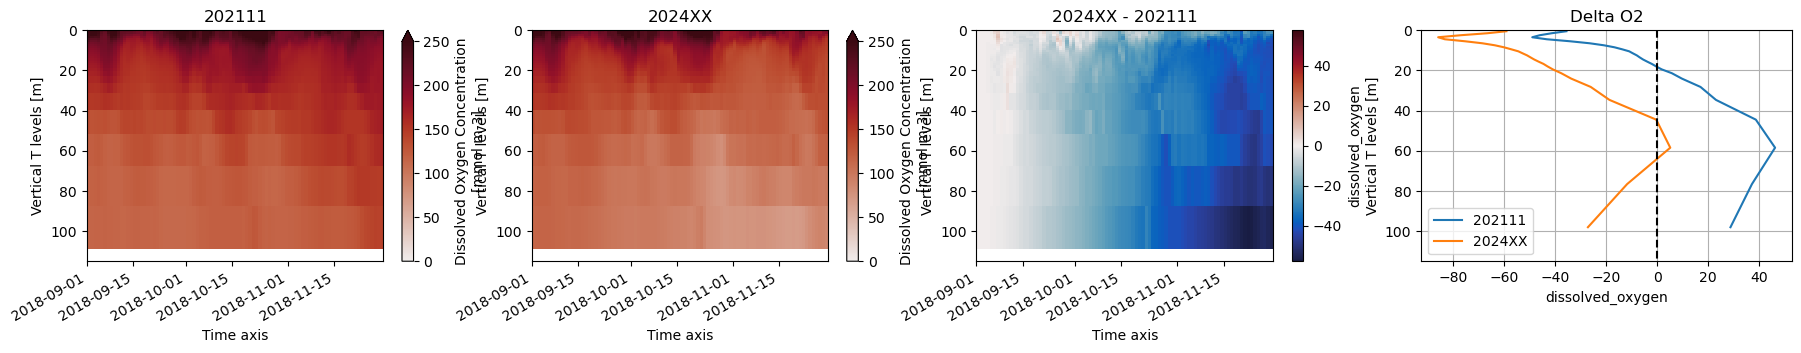

In [35]:
fig, ax = plt.subplots(1, 4, figsize = (22, 3)) 
df_chemold.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, ylim=(115, 0), xlim=(startdate, enddate));
df_chemnewox.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, ylim=(115, 0), xlim=(startdate, enddate));
o2diff.plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
Deltoxyold.plot(ax=ax[3], y="deptht", yincrease=False, ylim=(115, 0), label='202111');
Deltoxy.plot(ax=ax[3], y="deptht", yincrease=False, ylim=(115, 0), label='2024XX');
ax[3].plot([0, 0], [0, 115], '--k')
ax[3].grid()
ax[3].legend()

ax[0].set_title('202111')
ax[1].set_title('2024XX')
ax[2].set_title('2024XX - 202111')
ax[3].set_title('Delta O2')

# Oxygen budget in the new Config

In [16]:
df_diagnew

<xarray.Dataset>
Dimensions:                (y_grid_T: 898, x_grid_T: 398, nvertex_grid_T: 4,
                            deptht: 40, axis_nbounds: 2, y_grid_W: 898,
                            x_grid_W: 398, nvertex_grid_W: 4, depthw: 40,
                            time_counter: 91)
Coordinates:
    nav_lat_grid_T         (y_grid_T, x_grid_T) float32 ...
    nav_lon_grid_T         (y_grid_T, x_grid_T) float32 ...
  * deptht                 (deptht) float32 0.5 1.5 2.5 ... 387.6 414.5 441.5
    nav_lat_grid_W         (y_grid_W, x_grid_W) float32 ...
    nav_lon_grid_W         (y_grid_W, x_grid_W) float32 ...
  * depthw                 (depthw) float32 0.0 1.0 2.0 ... 374.1 401.1 428.0
    time_centered          (time_counter) datetime64[ns] ...
  * time_counter           (time_counter) datetime64[ns] 2018-09-01T12:00:00 ...
Dimensions without coordinates: y_grid_T, x_grid_T, nvertex_grid_T,
                                axis_nbounds, y_grid_W, x_grid_W, nvertex_grid_W
Data variables: (12/22)
    bounds_nav_lon_grid_T  (y_grid_T, x_grid_T, nvertex_grid_T) float32 ...
    bounds_nav_lat_grid_T  (y_grid_T, x_grid_T, nvertex_grid_T) float32 ...
    area_grid_T            (y_grid_T, x_grid_T) float32 ...
    deptht_bounds          (deptht, axis_nbounds) float32 ...
    bounds_nav_lon_grid_W  (y_grid_W, x_grid_W, nvertex_grid_W) float32 ...
    bounds_nav_lat_grid_W  (y_grid_W, x_grid_W, nvertex_grid_W) float32 ...
    ...                     ...
    NPP                    (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    RPP                    (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    NITR                   (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    RMIN                   (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    RMIC                   (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    RMES                   (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
Attributes:
    name:         SalishSea_1d_20180901_20181130_diag_T
    description:  diagnostic terms of DO
    title:        diagnostic terms of DO
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-21 00:11:02 GMT
    uuid:         82702162-2bf7-41a8-bf1b-8948764087f7

In [17]:
sinks_o2 = (df_diagnew.NITR + df_diagnew.RMIN + df_diagnew.RMIC + df_diagnew.RMES) #* 86400
#sinks_o2 = (df_diagnew2.RMIN + df_diagnew2.RMIC + df_diagnew2.RMES) #* 86400
sourc_o2 = (df_diagnew.NPP + df_diagnew.RPP) #* 86400
sms_o2 = sinks_o2 + sourc_o2

Sinks Biological Terms


Text(0.5, 1.0, 'Resp/Z1')

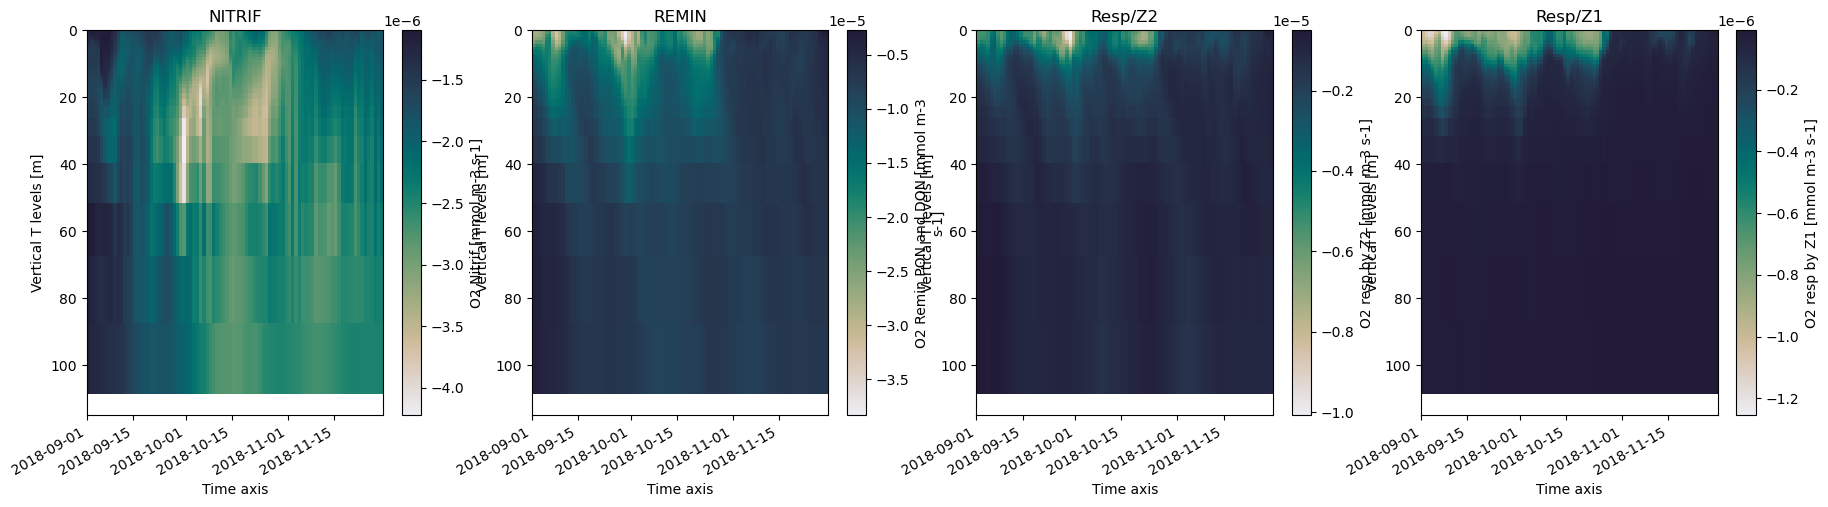

In [18]:
print('Sinks Biological Terms')
fig, ax = plt.subplots(1, 4, figsize = (22, 5)) 
df_diagnew.NITR[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.rain, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.RMIN[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.rain, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.RMES[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.rain, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.RMIC[:,:kk,jj,ii].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('NITRIF')
ax[1].set_title('REMIN')
ax[2].set_title('Resp/Z2')
ax[3].set_title('Resp/Z1')



Sources Biological Terms


Text(0.5, 1.0, 'RegPP')

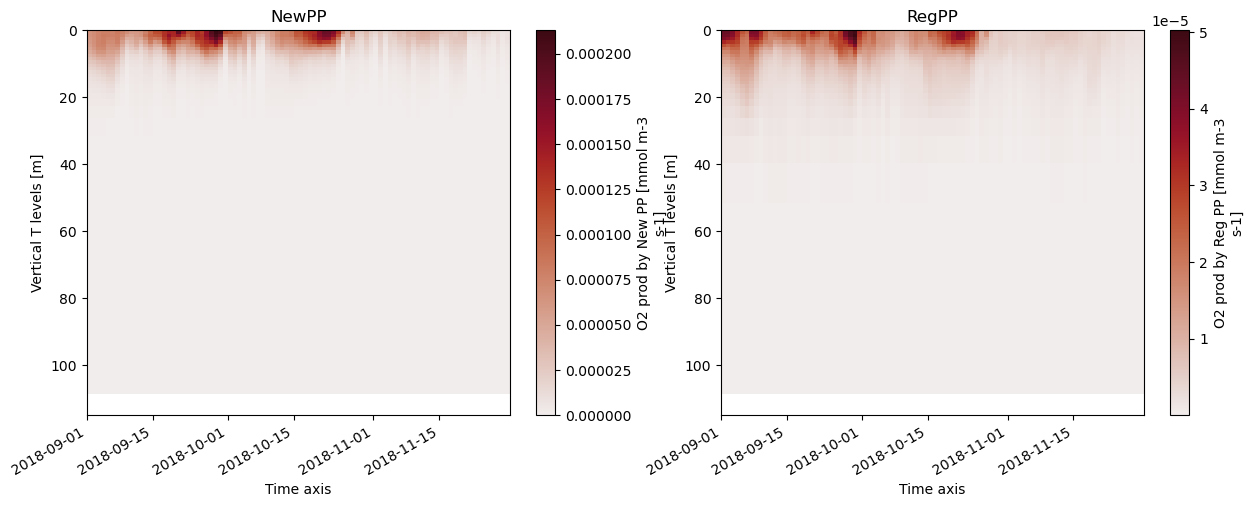

In [19]:
print('Sources Biological Terms')
fig, ax = plt.subplots(1, 2, figsize = (15, 5)) 
df_diagnew.NPP[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.RPP[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('NewPP')
ax[1].set_title('RegPP')

Sources Minus Sinks


Text(0.5, 1.0, 'SMS')

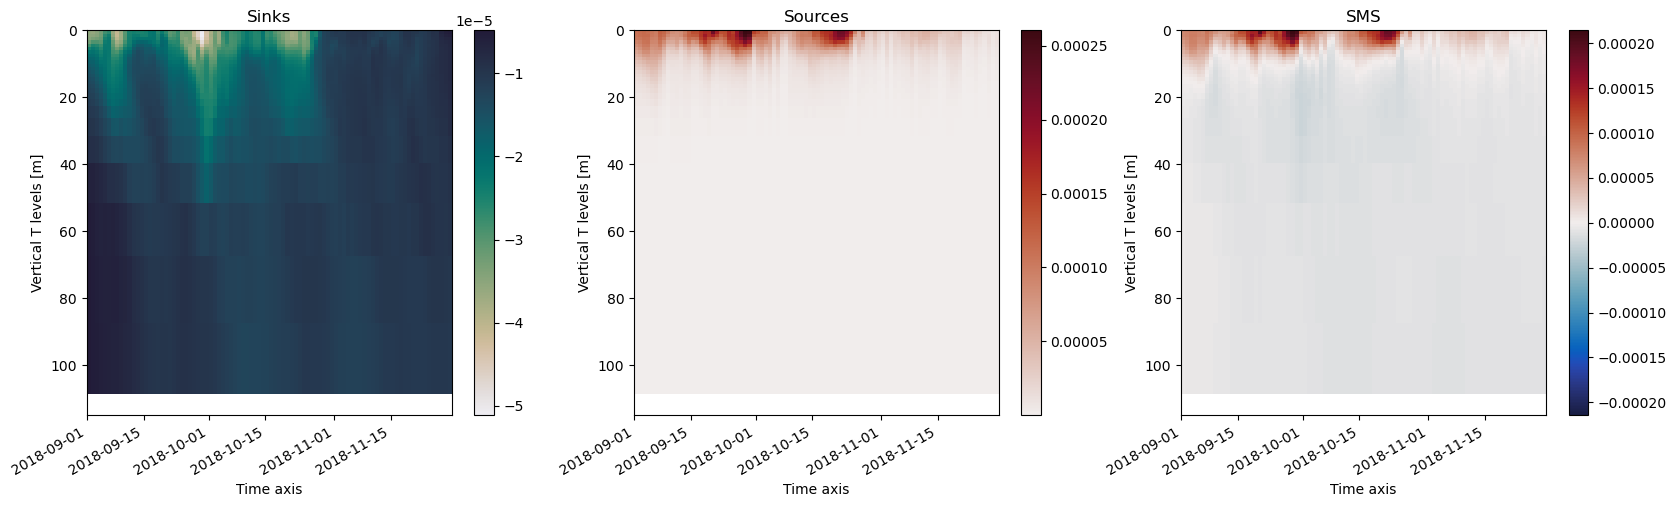

In [20]:
print('Sources Minus Sinks')
fig, ax = plt.subplots(1, 3, figsize = (20, 5)) 
sinks_o2[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.rain, ylim=(115, 0), xlim=(startdate, enddate));
sourc_o2[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp, ylim=(115, 0), xlim=(startdate, enddate));
sms_o2[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('Sinks')
ax[1].set_title('Sources')
ax[2].set_title('SMS')

In [21]:
AVDH = df_diagnew.XADV + df_diagnew.YADV
AVDT = AVDH + df_diagnew.ZADV
VMIXt = df_diagnew.VMIX - df_diagnew.VMIXH


Physical Terms


Text(0, 0.5, '')

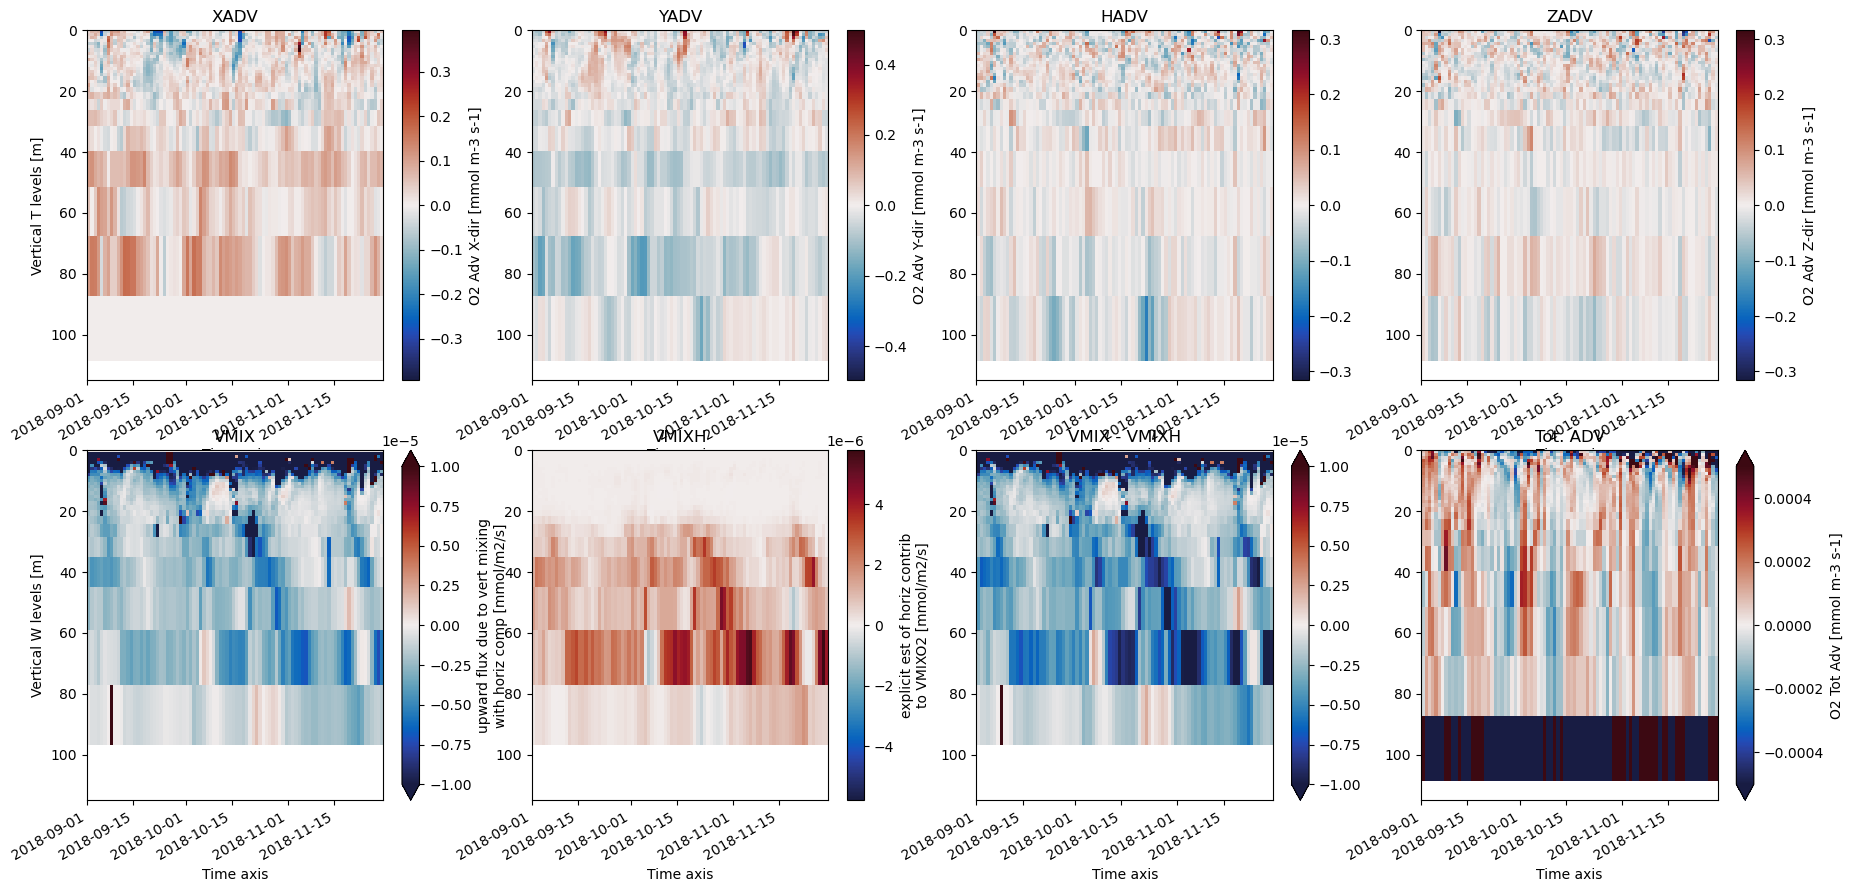

In [22]:
print('Physical Terms')
fig, ax = plt.subplots(2, 4, figsize = (22, 10)) 
df_diagnew.XADV[:,:kk,jj,ii].plot(ax=ax[0,0], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.YADV[:,:kk,jj,ii].plot(ax=ax[0,1], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
AVDH[:,:kk,jj,ii].plot(ax=ax[0,2], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.ZADV[:,:kk,jj,ii].plot(ax=ax[0,3], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));

df_diagnew.VMIX[:,:kk,jj,ii].plot(ax=ax[1,0], y="depthw", yincrease=False, cmap=cm.balance, vmin=-0.00001, vmax=0.00001, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.VMIXH[:,:kk,jj,ii].plot(ax=ax[1,1], y="depthw", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
VMIXt[:,:kk,jj,ii].plot(ax=ax[1,2], y="depthw", yincrease=False, cmap=cm.balance, vmin=-0.00001, vmax=0.00001, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.TADV[:,:kk,jj,ii].plot(ax=ax[1,3], y="deptht", yincrease=False, cmap=cm.balance, vmin=-0.0005, vmax=0.0005, ylim=(115, 0), xlim=(startdate, enddate));

ax[0,0].set_title('XADV')
ax[0,1].set_title('YADV')
ax[0,2].set_title('HADV')
ax[0,3].set_title('ZADV')

ax[1,0].set_title('VMIX')
ax[1,1].set_title('VMIXH')
ax[1,2].set_title('VMIX - VMIXH')
ax[1,3].set_title('Tot. ADV')

ax[0,1].set_ylabel('')
ax[0,2].set_ylabel('')
ax[0,3].set_ylabel('')
ax[1,1].set_ylabel('')
ax[1,2].set_ylabel('')
ax[1,3].set_ylabel('')

# Resume - Oxygen Budget

In [23]:
ADVd = df_diagnew.TADV * 86400
SMSd = sms_o2 * 86400
VMIXd = df_diagnew.VMIX * 86400
REMd = df_diagnew.RMIN * 86400

Text(0.5, 1.0, 'Vert. Mixing (mmol/m2/day)')

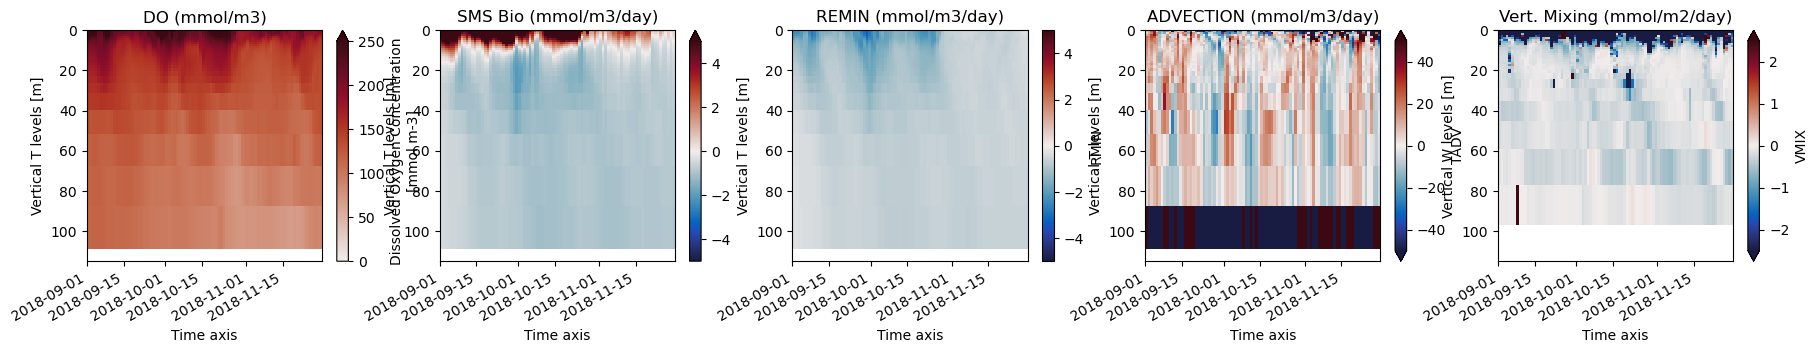

In [24]:
fig, ax = plt.subplots(1, 5, figsize = (22, 3)) 
df_chemnewox.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, ylim=(115, 0), xlim=(startdate, enddate));
SMSd[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.balance, vmin=-5, vmax=5, ylim=(115, 0), xlim=(startdate, enddate));
REMd[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance, vmin=-5, vmax=5, ylim=(115, 0), xlim=(startdate, enddate));
ADVd[:,:kk,jj,ii].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.balance, vmin=-50, vmax=50, ylim=(115, 0), xlim=(startdate, enddate));
VMIXd[:,:kk,jj,ii].plot(ax=ax[4], y="depthw", yincrease=False, cmap=cm.balance, vmin=-2.5, vmax=2.5, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('DO (mmol/m3)')
ax[1].set_title('SMS Bio (mmol/m3/day)')
ax[2].set_title('REMIN (mmol/m3/day)')
ax[3].set_title('ADVECTION (mmol/m3/day)')
ax[4].set_title('Vert. Mixing (mmol/m2/day)')

# Diag along the thalweg

In [25]:
thalweg_file = '/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt'
thalweg_SoG = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'

meshb = nc.Dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/mesh_mask_202310b.nc')
bathyb = nc.Dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry_202310b.nc')

depthb = meshb.variables['gdept_0'][:]
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)
thalweg_pts0 = np.loadtxt(thalweg_SoG, delimiter=' ', dtype=int)

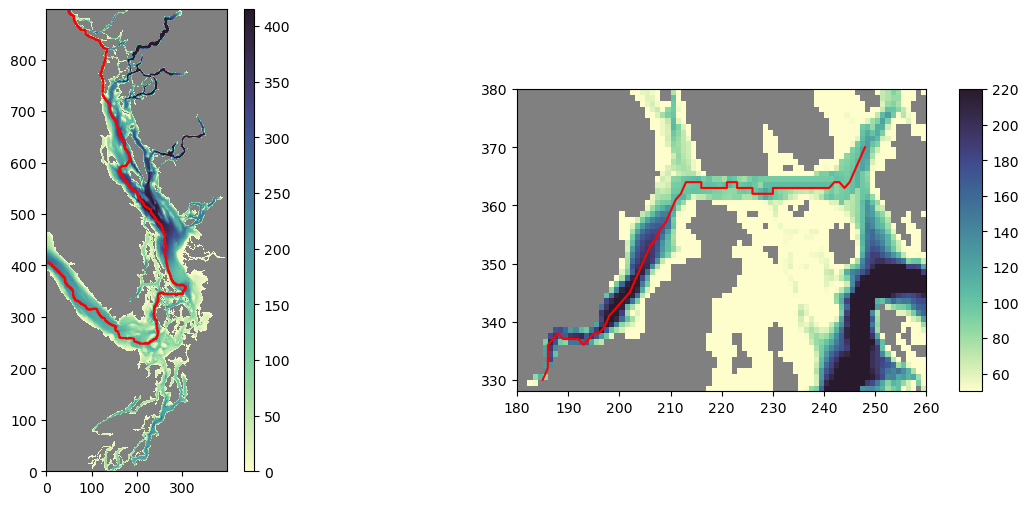

In [26]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, ax = plt.subplots(1, 2, figsize=(14, 6))
mycmap = cm.deep
mycmap.set_bad('grey')
im = ax[0].pcolormesh(bathyb.variables['Bathymetry'][:], cmap=mycmap, vmin=0, vmax=415)
ax[0].plot(thalweg_pts0[:,1],thalweg_pts0[:,0],color='r')
im2 = ax[1].pcolormesh(bathyb.variables['Bathymetry'][:], cmap=mycmap, vmin=50, vmax=220)
ax[1].plot(thalweg_pts[:,1],thalweg_pts[:,0],color='r')
viz_tools.set_aspect(ax[0]);
viz_tools.set_aspect(ax[1]);
#ax[0].set_xlim([180, 260])
#ax[0].set_ylim([328, 380])
ax[1].set_xlim([180, 260])
ax[1].set_ylim([328, 380])
divider = make_axes_locatable(ax[0])
divider2 = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')


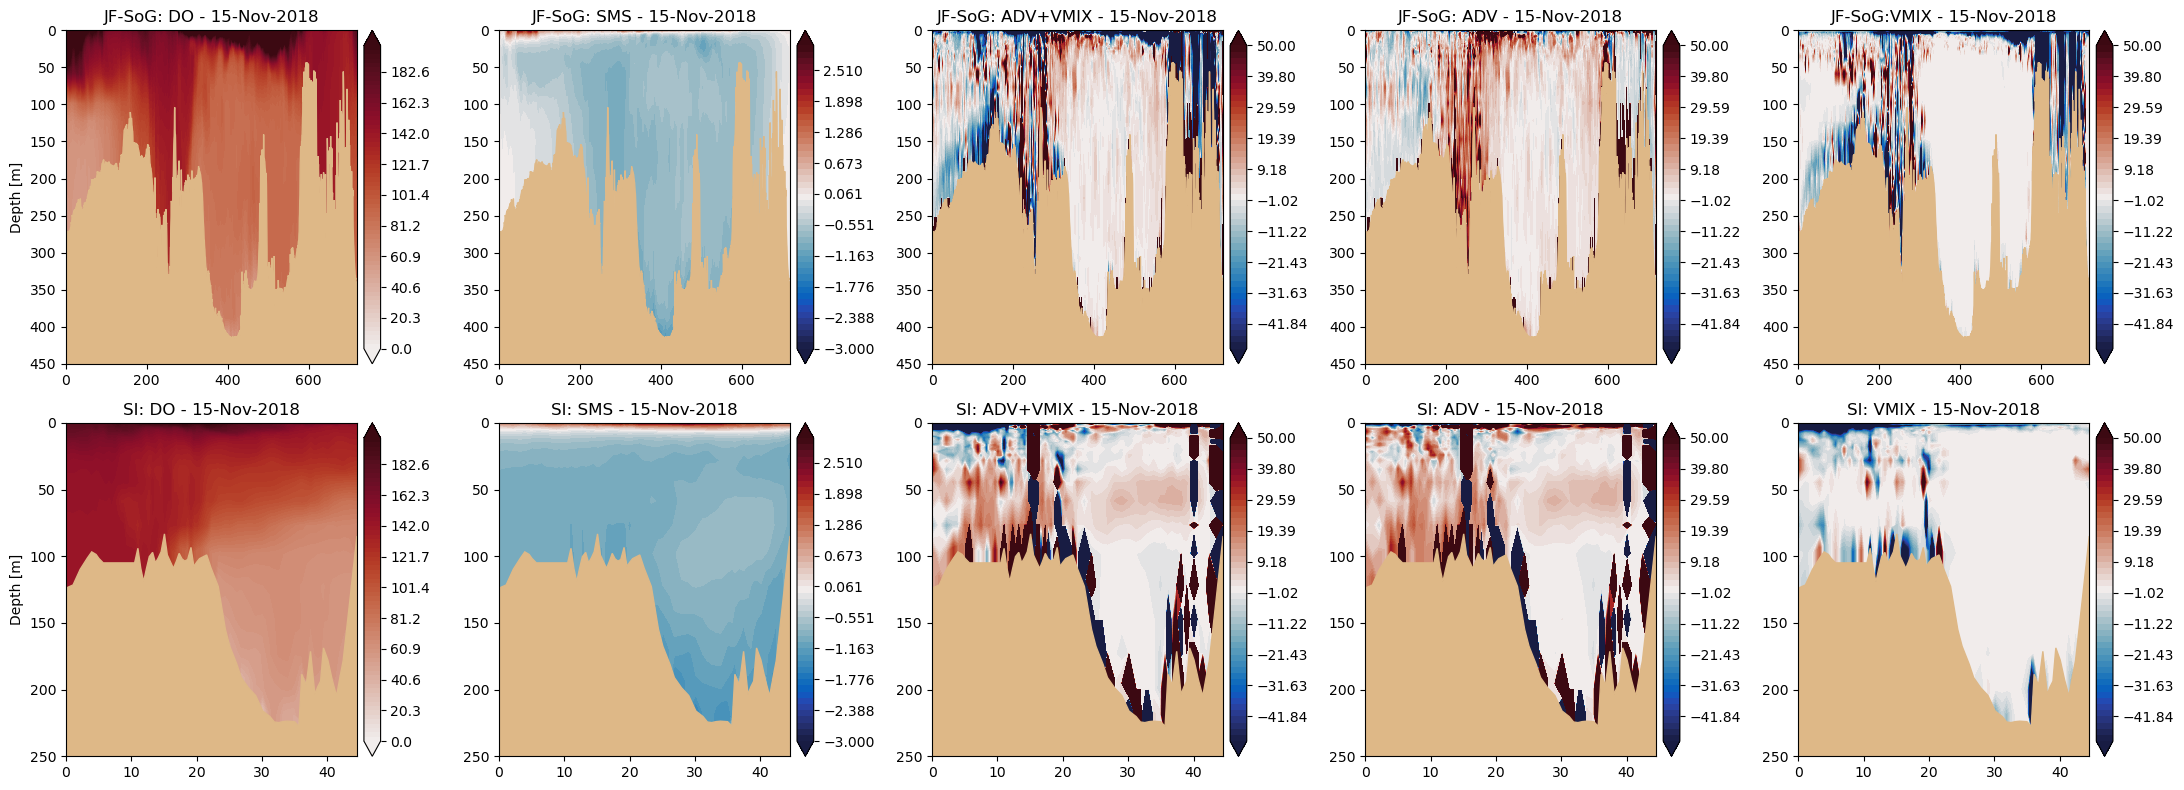

In [27]:
fig, axs = plt.subplots(2, 5, figsize=(22, 8))
lp, cpoxy, cpsms, cpdyn, cpadv, cpmix = 0, 0, 1, 2, 3, 4
Month = list(['14-Nov-2018','15-Nov-2018'])
for month in range(76, 76+1):
    dep_thal0, distance0, oxy_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(df_chemnewox.dissolved_oxygen[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)
    dep_thal0, distance0, sms_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(SMSd[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)
    dep_thal0, distance0, adv_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(ADVd[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)
    dep_thal0, distance0, mix_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(VMIXd[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)
    dep_thal, distance, oxy_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_chemnewox.dissolved_oxygen[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, sms_thal = vis.load_thalweg(
                depthb[0, ...], np.array(SMSd[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, adv_thal = vis.load_thalweg(
                depthb[0, ...], np.array(ADVd[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, mix_thal = vis.load_thalweg(
                depthb[0, ...], np.array(VMIXd[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    mix_plot0 = vis._fill_in_bathy(mix_thal0, meshb, thalweg_pts0)
    sms_plot0 = vis._fill_in_bathy(sms_thal0, meshb, thalweg_pts0)
    dyn_plot0 = vis._fill_in_bathy(adv_thal0+mix_plot0, meshb, thalweg_pts0)
    adv_plot0 = vis._fill_in_bathy(adv_thal0, meshb, thalweg_pts0)
    oxy_plot0 = vis._fill_in_bathy(oxy_thal0, meshb, thalweg_pts0)
    mix_plot = vis._fill_in_bathy(mix_thal, meshb, thalweg_pts)
    sms_plot = vis._fill_in_bathy(sms_thal, meshb, thalweg_pts)
    dyn_plot = vis._fill_in_bathy(adv_thal+mix_plot, meshb, thalweg_pts)
    adv_plot = vis._fill_in_bathy(adv_thal, meshb, thalweg_pts)
    oxy_plot = vis._fill_in_bathy(oxy_thal, meshb, thalweg_pts)
    colours_oxy0 = axs[lp,cpoxy].contourf(distance0, dep_thal0, oxy_plot0, np.linspace(0, 200, 70),                                     
                                    cmap=cm.amp, extend='both')
    colours_sms0 = axs[lp,cpsms].contourf(distance0, dep_thal0, sms_plot0, np.linspace(-3, 3, 50), 
                                     cmap=cm.balance, extend='both')
    colours_dyn0 = axs[lp,cpdyn].contourf(distance0, dep_thal0, dyn_plot0, np.linspace(-50, 50, 50), 
                                     cmap=cm.balance, extend='both')
    colours_adv0 = axs[lp,cpadv].contourf(distance0, dep_thal0, adv_plot0, np.linspace(-50, 50, 50), 
                                     cmap=cm.balance, extend='both')
    colours_mix0 = axs[lp,cpmix].contourf(distance0, dep_thal0, mix_plot0, np.linspace(-50, 50, 50), 
                                     cmap=cm.balance, extend='both')
    colours_oxy = axs[lp+1,cpoxy].contourf(distance, dep_thal, oxy_plot, np.linspace(0, 200, 70),                                     
                                    cmap=cm.amp, extend='both')
    colours_sms = axs[lp+1,cpsms].contourf(distance, dep_thal, sms_plot, np.linspace(-3, 3, 50), 
                                     cmap=cm.balance, extend='both')
    colours_dyn = axs[lp+1,cpdyn].contourf(distance, dep_thal, dyn_plot, np.linspace(-50, 50, 50), 
                                     cmap=cm.balance, extend='both')
    colours_adv = axs[lp+1,cpadv].contourf(distance, dep_thal, adv_plot, np.linspace(-50, 50, 50), 
                                     cmap=cm.balance, extend='both')
    colours_mix = axs[lp+1,cpmix].contourf(distance, dep_thal, mix_plot, np.linspace(-50, 50, 50), 
                                     cmap=cm.balance, extend='both')

    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[lp,cpoxy], color='burlywood')
    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[lp,cpsms], color='burlywood')
    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[lp,cpdyn], color='burlywood')
    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[lp,cpadv], color='burlywood')
    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[lp,cpmix], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp+1,cpoxy], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp+1,cpsms], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp+1,cpdyn], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp+1,cpadv], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp+1,cpmix], color='burlywood')
    axs[lp,cpoxy].invert_yaxis()
    axs[lp,cpsms].invert_yaxis()
    axs[lp,cpdyn].invert_yaxis()
    axs[lp,cpadv].invert_yaxis()
    axs[lp,cpmix].invert_yaxis()
    axs[lp+1,cpoxy].invert_yaxis()
    axs[lp+1,cpsms].invert_yaxis()
    axs[lp+1,cpdyn].invert_yaxis()
    axs[lp+1,cpadv].invert_yaxis()
    axs[lp+1,cpmix].invert_yaxis()
    axs[lp,cpoxy].set_ylim(450, 0)
    axs[lp,cpsms].set_ylim(450, 0)
    axs[lp,cpdyn].set_ylim(450, 0)
    axs[lp,cpadv].set_ylim(450, 0)
    axs[lp,cpmix].set_ylim(450, 0)
    axs[lp+1,cpoxy].set_ylim(250, 0)
    axs[lp+1,cpsms].set_ylim(250, 0)
    axs[lp+1,cpdyn].set_ylim(250, 0)
    axs[lp+1,cpadv].set_ylim(250, 0)
    axs[lp+1,cpmix].set_ylim(250, 0)
    axs[lp,cpoxy].set_ylabel('Depth [m]');
    axs[lp+1,cpoxy].set_ylabel('Depth [m]');
    axs[lp,cpoxy].set_title(f'JF-SoG: DO - {Month[month-75]}')
    axs[lp,cpsms].set_title(f'JF-SoG: SMS - {Month[month-75]}')
    axs[lp,cpdyn].set_title(f'JF-SoG: ADV+VMIX - {Month[month-75]}')
    axs[lp,cpadv].set_title(f'JF-SoG: ADV - {Month[month-75]}')
    axs[lp,cpmix].set_title(f'JF-SoG:VMIX - {Month[month-75]}')
    axs[lp+1,cpoxy].set_title(f'SI: DO - {Month[month-75]}')
    axs[lp+1,cpsms].set_title(f'SI: SMS - {Month[month-75]}')
    axs[lp+1,cpdyn].set_title(f'SI: ADV+VMIX - {Month[month-75]}')
    axs[lp+1,cpadv].set_title(f'SI: ADV - {Month[month-75]}')
    axs[lp+1,cpmix].set_title(f'SI: VMIX - {Month[month-75]}')
    cbar = fig.colorbar(colours_oxy0, ax=axs[lp,cpoxy], pad=0.02)
    cbar = fig.colorbar(colours_sms0, ax=axs[lp,cpsms], pad=0.02)
    cbar = fig.colorbar(colours_dyn0, ax=axs[lp,cpdyn], pad=0.02)
    cbar = fig.colorbar(colours_adv0, ax=axs[lp,cpadv], pad=0.02)
    cbar = fig.colorbar(colours_mix0, ax=axs[lp,cpmix], pad=0.02)
    cbar = fig.colorbar(colours_oxy, ax=axs[lp+1,cpoxy], pad=0.02)
    cbar = fig.colorbar(colours_sms, ax=axs[lp+1,cpsms], pad=0.02)
    cbar = fig.colorbar(colours_dyn, ax=axs[lp+1,cpdyn], pad=0.02)
    cbar = fig.colorbar(colours_adv, ax=axs[lp+1,cpadv], pad=0.02)
    cbar = fig.colorbar(colours_mix, ax=axs[lp+1,cpmix], pad=0.02)
    lp = lp + 1;
#fig.suptitle('10-14 Nov 2018 - SalishSea_oxy - Victoria Sill - Saanich Inlet');
fig.tight_layout();